# Supervised Learning Model Evaluation Lab

Complete the exercises below to solidify your knowledge and understanding of supervised learning model evaluation.

In [22]:
# Importar librerías básicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importar herramientas de evaluación de modelos de Scikit-Learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_squared_error, mean_absolute_error, r2_score,  # Para regresión
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc  # Para clasificación
)

# Importar modelos para probar
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

## Regression Model Evaluation

In [29]:
column_names = ["CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", "DIS",
                "RAD", "TAX", "PTRATIO", "B", "LSTAT", "MEDV"]

df = pd.read_csv("housing.csv", header=None, delim_whitespace=True, names=column_names)

# Verificar nuevamente las columnas
print("Nombres de las columnas corregidos:")
print(df.columns)


Nombres de las columnas corregidos:
Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')


<ipython-input-29-baf0c46955f7>:4: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv("housing.csv", header=None, delim_whitespace=True, names=column_names)


In [30]:
"""
CRIM - per capita crime rate by town
ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
INDUS - proportion of non-retail business acres per town.
CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
NOX - nitric oxides concentration (parts per 10 million)
RM - average number of rooms per dwelling
AGE - proportion of owner-occupied units built prior to 1940
DIS - weighted distances to five Boston employment centres
RAD - index of accessibility to radial highways
TAX - full-value property-tax rate per $10,000
PTRATIO - pupil-teacher ratio by town
B - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
LSTAT - % lower status of the population
MEDV - Median value of owner-occupied homes in $1000's"""

"\nCRIM - per capita crime rate by town\nZN - proportion of residential land zoned for lots over 25,000 sq.ft.\nINDUS - proportion of non-retail business acres per town.\nCHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)\nNOX - nitric oxides concentration (parts per 10 million)\nRM - average number of rooms per dwelling\nAGE - proportion of owner-occupied units built prior to 1940\nDIS - weighted distances to five Boston employment centres\nRAD - index of accessibility to radial highways\nTAX - full-value property-tax rate per $10,000\nPTRATIO - pupil-teacher ratio by town\nB - 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town\nLSTAT - % lower status of the population\nMEDV - Median value of owner-occupied homes in $1000's"

In [25]:
data

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273.0,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273.0,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273.0,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273.0,21.0,393.45,6.48,22.0


## 1. Split this data set into training (80%) and testing (20%) sets.

The `MEDV` field represents the median value of owner-occupied homes (in $1000's) and is the target variable that we will want to predict.

In [31]:
from sklearn.model_selection import train_test_split

# Separar variables predictoras (X) y variable objetivo (y)
X = df.drop(columns=['MEDV'])  # Variables predictoras
y = df['MEDV']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar dimensiones
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)



Tamaño del conjunto de entrenamiento: (404, 13)
Tamaño del conjunto de prueba: (102, 13)


## 2. Train a `LinearRegression` model on this data set and generate predictions on both the training and the testing set.

In [32]:
# Importar la librería necesaria
from sklearn.linear_model import LinearRegression

# Inicializar el modelo de Regresión Lineal
lin_reg = LinearRegression()

# Entrenar el modelo con los datos de entrenamiento
lin_reg.fit(X_train, y_train)

# Realizar predicciones en los conjuntos de entrenamiento y prueba
y_train_pred = lin_reg.predict(X_train)
y_test_pred = lin_reg.predict(X_test)

# Mostrar algunas predicciones
print("Primeras predicciones en el conjunto de prueba:")
print(y_test_pred[:5])



Primeras predicciones en el conjunto de prueba:
[28.99672362 36.02556534 14.81694405 25.03197915 18.76987992]


## 3. Calculate and print R-squared for both the training and the testing set.

In [33]:
# Importar la métrica de R-cuadrado
from sklearn.metrics import r2_score

# Calcular R² para el conjunto de entrenamiento y prueba
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

print(f"R² en el conjunto de entrenamiento: {r2_train:.4f}")
print(f"R² en el conjunto de prueba: {r2_test:.4f}")


R² en el conjunto de entrenamiento: 0.7509
R² en el conjunto de prueba: 0.6688


## 4. Calculate and print mean squared error for both the training and the testing set.

In [34]:
# Importar la métrica de Mean Squared Error (MSE)
from sklearn.metrics import mean_squared_error

# Calcular MSE para el conjunto de entrenamiento y prueba
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

print(f"Mean Squared Error (MSE) en el conjunto de entrenamiento: {mse_train:.4f}")
print(f"Mean Squared Error (MSE) en el conjunto de prueba: {mse_test:.4f}")


Mean Squared Error (MSE) en el conjunto de entrenamiento: 21.6414
Mean Squared Error (MSE) en el conjunto de prueba: 24.2911


## 5. Calculate and print mean absolute error for both the training and the testing set.

In [35]:
# Importar la métrica de Mean Absolute Error (MAE)
from sklearn.metrics import mean_absolute_error

# Calcular MAE para el conjunto de entrenamiento y prueba
mae_train = mean_absolute_error(y_train, y_train_pred)
mae_test = mean_absolute_error(y_test, y_test_pred)

print(f"Mean Absolute Error (MAE) en el conjunto de entrenamiento: {mae_train:.4f}")
print(f"Mean Absolute Error (MAE) en el conjunto de prueba: {mae_test:.4f}")


Mean Absolute Error (MAE) en el conjunto de entrenamiento: 3.3148
Mean Absolute Error (MAE) en el conjunto de prueba: 3.1891


## Classification Model Evaluation

In [38]:
# Importar dataset iris
from sklearn.datasets import load_iris
import pandas as pd
# Cargar datos
data = load_iris()

In [39]:
# Mostrar descripción del dataset
print(data.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

:Number of Instances: 150 (50 in each of three classes)
:Number of Attributes: 4 numeric, predictive attributes and the class
:Attribute Information:
    - sepal length in cm
    - sepal width in cm
    - petal length in cm
    - petal width in cm
    - class:
            - Iris-Setosa
            - Iris-Versicolour
            - Iris-Virginica

:Summary Statistics:

============== ==== ==== ======= ===== ====================
                Min  Max   Mean    SD   Class Correlation
============== ==== ==== ======= ===== ====================
sepal length:   4.3  7.9   5.84   0.83    0.7826
sepal width:    2.0  4.4   3.05   0.43   -0.4194
petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
============== ==== ==== ======= ===== ====================

:Missing Attribute Values: None
:Class Distribution: 33.3% for each of 3 classes.
:Cr

In [40]:
# Crear DataFrame con las features
column_names = data.feature_names  # Nombres de columnas

In [41]:
X = pd.DataFrame(data.data, columns=column_names)

In [42]:
# Mostrar primeras filas de X
print("Primeras filas del dataset:")
display(X.head())

Primeras filas del dataset:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [43]:
# Crear variable objetivo (y)
y = pd.DataFrame(data.target, columns=["Target"])

In [44]:
# Mostrar distribución de la variable objetivo
print("\nDistribución de clases en el dataset:")
print(y["Target"].value_counts())



Distribución de clases en el dataset:
Target
0    50
1    50
2    50
Name: count, dtype: int64


In [45]:
# Información general del DataFrame X
print("\nInformación de las features:")
display(X.describe())


Información de las features:


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## 6. Split this data set into training (80%) and testing (20%) sets.

The `class` field represents the type of flower and is the target variable that we will want to predict.

In [55]:
# Importar librerías necesarias
from sklearn.model_selection import train_test_split

# Definir la variable objetivo correctamente
target_column = "MEDV"  # Aquí usamos el nombre correcto de la variable objetivo

# Separar las variables predictoras (X) y la variable objetivo (y)
X = df.drop(columns=[target_column])
y = df[target_column]

# Dividir los datos en conjunto de entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar dimensiones
print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)

# Convertir la variable MEDV en clases binarias (Clasificación en lugar de Regresión)
df["MEDV_class"] = (df["MEDV"] > 25).astype(int)  # 0 si <= 25, 1 si > 25

# Usamos la nueva variable categórica para clasificación
X = df.drop(columns=["MEDV", "MEDV_class"])  # Variables predictoras
y = df["MEDV_class"]  # Variable objetivo categórica

# Dividir el dataset en entrenamiento y prueba
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Tamaño del conjunto de entrenamiento:", X_train.shape)
print("Tamaño del conjunto de prueba:", X_test.shape)



Tamaño del conjunto de entrenamiento: (404, 13)
Tamaño del conjunto de prueba: (102, 13)
Tamaño del conjunto de entrenamiento: (404, 13)
Tamaño del conjunto de prueba: (102, 13)


## 7. Train a `LogisticRegression` model on this data set and generate predictions on both the training and the testing set.

In [56]:
from sklearn.linear_model import LogisticRegression

# Entrenar el modelo
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)

# Hacer predicciones
y_train_pred = log_reg.predict(X_train)
y_test_pred = log_reg.predict(X_test)

print("Primeras predicciones en conjunto de prueba:", y_test_pred[:5])



Primeras predicciones en conjunto de prueba: [1 1 0 0 0]


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 8. Calculate and print the accuracy score for both the training and the testing set.

In [57]:
from sklearn.metrics import accuracy_score

# Calcular la precisión del modelo
accuracy_train = accuracy_score(y_train, y_train_pred)
accuracy_test = accuracy_score(y_test, y_test_pred)

print(f"Accuracy en entrenamiento: {accuracy_train:.4f}")
print(f"Accuracy en prueba: {accuracy_test:.4f}")



Accuracy en entrenamiento: 0.9257
Accuracy en prueba: 0.9314


## 9. Calculate and print the balanced accuracy score for both the training and the testing set.

In [58]:
from sklearn.metrics import balanced_accuracy_score

# Calcular balanced accuracy
balanced_accuracy_train = balanced_accuracy_score(y_train, y_train_pred)
balanced_accuracy_test = balanced_accuracy_score(y_test, y_test_pred)

print(f"Balanced Accuracy en entrenamiento: {balanced_accuracy_train:.4f}")
print(f"Balanced Accuracy en prueba: {balanced_accuracy_test:.4f}")


Balanced Accuracy en entrenamiento: 0.8911
Balanced Accuracy en prueba: 0.8564


## 10. Calculate and print the precision score for both the training and the testing set.

In [59]:
from sklearn.metrics import precision_score

# Calcular la precisión del modelo
precision_train = precision_score(y_train, y_train_pred)
precision_test = precision_score(y_test, y_test_pred)

print(f"Precision en entrenamiento: {precision_train:.4f}")
print(f"Precision en prueba: {precision_test:.4f}")


Precision en entrenamiento: 0.8866
Precision en prueba: 0.8750


## 11. Calculate and print the recall score for both the training and the testing set.

In [60]:
from sklearn.metrics import recall_score

# Calcular recall
recall_train = recall_score(y_train, y_train_pred)
recall_test = recall_score(y_test, y_test_pred)

print(f"Recall en entrenamiento: {recall_train:.4f}")
print(f"Recall en prueba: {recall_test:.4f}")


Recall en entrenamiento: 0.8190
Recall en prueba: 0.7368


## 12. Calculate and print the F1 score for both the training and the testing set.

In [61]:
from sklearn.metrics import f1_score

# Calcular el F1-score
f1_train = f1_score(y_train, y_train_pred)
f1_test = f1_score(y_test, y_test_pred)

print(f"F1-score en entrenamiento: {f1_train:.4f}")
print(f"F1-score en prueba: {f1_test:.4f}")


F1-score en entrenamiento: 0.8515
F1-score en prueba: 0.8000


## 13. Generate confusion matrices for both the training and the testing set.

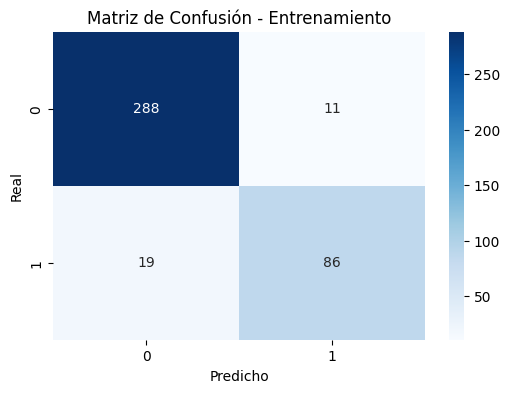

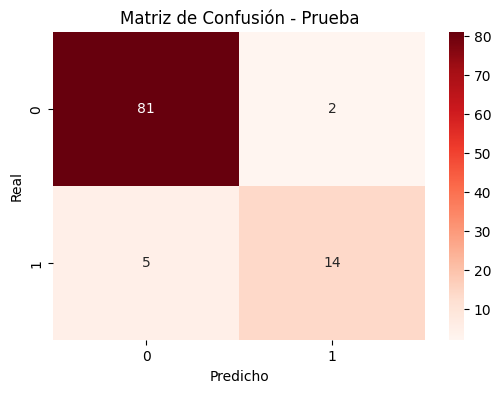

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Calcular matrices de confusión
conf_matrix_train = confusion_matrix(y_train, y_train_pred)
conf_matrix_test = confusion_matrix(y_test, y_test_pred)

# Visualizar matriz de confusión en entrenamiento
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_train, annot=True, fmt="d", cmap="Blues")
plt.title("Matriz de Confusión - Entrenamiento")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()

# Visualizar matriz de confusión en prueba
plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix_test, annot=True, fmt="d", cmap="Reds")
plt.title("Matriz de Confusión - Prueba")
plt.xlabel("Predicho")
plt.ylabel("Real")
plt.show()


## Bonus: For each of the data sets in this lab, try training with some of the other models you have learned about, recalculate the evaluation metrics, and compare to determine which models perform best on each data set.

In [69]:
# Importar librerías necesarias
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Cargar dataset Iris
iris = load_iris()
X = iris.data
y = iris.target

# Escalar los datos
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir datos en entrenamiento (80%) y prueba (20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Conjunto de entrenamiento:", X_train.shape)
print("✅ Conjunto de prueba:", X_test.shape)

# Lista de modelos a probar
models = {
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(n_estimators=100),
    "SVM": SVC(kernel="linear"),
    "KNN": KNeighborsClassifier(n_neighbors=5)
}

# Evaluar modelos
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"🔹 {name} - Accuracy: {acc:.4f}")






✅ Conjunto de entrenamiento: (120, 4)
✅ Conjunto de prueba: (30, 4)
🔹 Decision Tree - Accuracy: 1.0000
🔹 Random Forest - Accuracy: 1.0000
🔹 SVM - Accuracy: 0.9667
🔹 KNN - Accuracy: 1.0000


In [ ]:
from google.colab import drive
drive.mount('/content/drive')